In [19]:
import csv
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta



In [20]:
data = []
with open('gv-data/data/all.csv', newline='') as csvfile:
    reader = csv.DictReader(csvfile)
    for row in reader:
        row['time'] = float(row['time'])  # Convert 'time' to float
        row['cell_index'] = int(row['cell_index'])  # Convert 'cell_index' to int
        data.append(dict(row))


In [38]:
times = np.array([row['time'] for row in data])
uuids = np.array([row['device_uuid'] for row in data])
towers = np.array([row['cell_index'] for row in data])

time_diff = []
time_diff_x = []
for uuid in np.unique(uuids):
    indices = np.where(uuids == uuid)[0]
    time_diff += np.diff(times[indices]).tolist()
    time_diff_x += times[indices[:-1]].tolist()

time_diff = np.array(time_diff)
time_diff_x = np.array(time_diff_x)

# Reject any diff over 12 hours
time_diff_filtered = time_diff[time_diff <= 12 * 60 * 60]
time_diff_x_filtered = time_diff_x[time_diff <= 12 * 60 * 60]
print(len(time_diff) - len(time_diff_filtered))


148


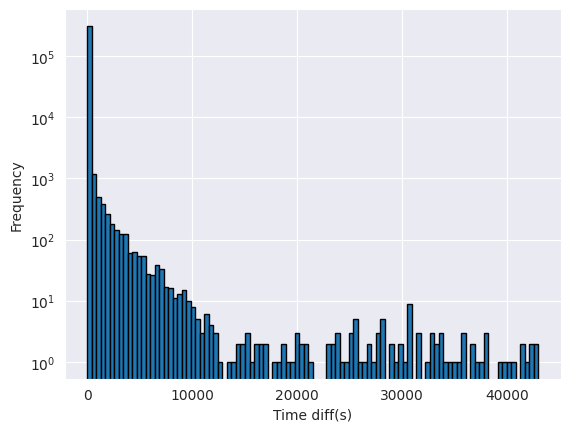

In [29]:
# Plotting a histogram
plt.hist(time_diff_filtered, bins=100, edgecolor='black')
plt.xlabel('Time diff(s)')
plt.ylabel('Frequency')
plt.yscale('log')
# plt.xscale('log')
plt.grid(True)
plt.show()

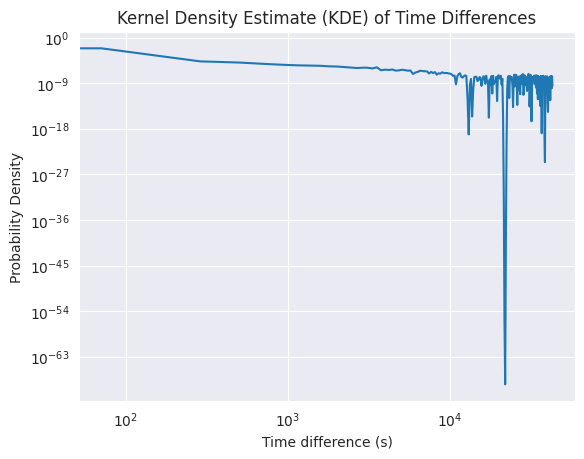

In [30]:
plt.figure()
sns.kdeplot(time_diff_filtered)
plt.xlabel('Time difference (s)')
plt.ylabel('Probability Density')
plt.yscale('log')
plt.xscale('log')
plt.grid(True)
plt.title('Kernel Density Estimate (KDE) of Time Differences')
plt.show()


[178.95868869 104.89782438  80.16028294 ... 116.48970732  92.51959804
 153.69344827]


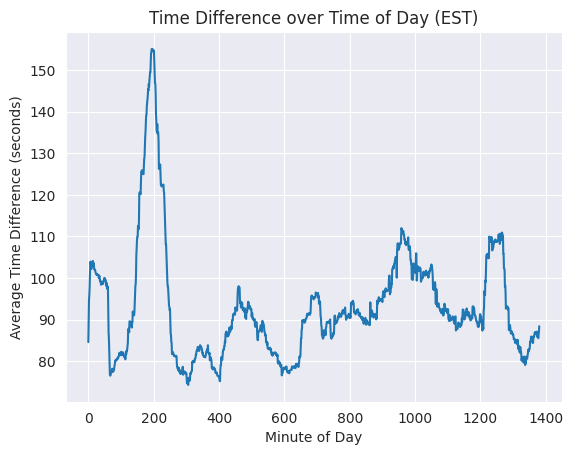

In [42]:
def convert_epoch_to_est(epoch_time):
    return datetime.fromtimestamp(epoch_time) - timedelta(hours=5)  # EST is UTC-5

datetimes = [convert_epoch_to_est(time) for time in time_diff_x_filtered]
minutes_of_day = np.array([time.hour * 60 + time.minute for time in datetimes])
minute_time_diff_sums = np.zeros(24 * 60) 
minute_time_diff_counts = np.zeros(24 * 60, dtype=int) 

for i in range(len(minutes_of_day)):
    minute_time_diff_counts[minutes_of_day[i]] += 1
    minute_time_diff_sums[minutes_of_day[i]] += time_diff_filtered[i]

with np.errstate(divide='ignore', invalid='ignore'):
    diff_by_minute = minute_time_diff_sums / minute_time_diff_counts
    print(diff_by_minute)
    diff_by_minute[~np.isfinite(diff_by_minute)] = 0



def moving_average(y, window_size):
    return np.convolve(y, np.ones(window_size)/window_size, mode='valid')

# Assuming time_d
# Plotting
plt.figure()
plt.plot(moving_average(diff_by_minute, 60), label='Average Time Differences')
plt.title('Time Difference over Time of Day (EST)')
plt.xlabel('Minute of Day')
plt.ylabel('Average Time Difference (seconds)')
plt.grid(True)
plt.show()


In [25]:
for uuid in np.unique(uuids):
    indices = np.where(uuids == uuid)[0]
    start =  datetime.fromtimestamp(np.min(times[indices]))
    end =  datetime.fromtimestamp(np.max(times[indices]))
    print(uuid, "start", start, "end", end)
    

022f10bb-0453-4473-8205-e393270bf933 start 2024-05-31 12:44:13.150000 end 2024-07-01 09:59:17.753000
07160bbc-4cc5-42b2-8d66-bdf58f3ed4ea start 2024-05-31 12:43:13.465000 end 2024-06-11 12:09:00.781000
08d8c36a-4c5c-4f68-84e4-eb09ca507cff start 2024-05-31 15:31:52.036000 end 2024-06-11 11:56:33.928000
0e19e2c7-0169-472f-b146-a0e8efcc7db0 start 2024-05-31 12:44:12.115000 end 2024-06-14 13:01:03.807000
13da0e3d-6955-4b8e-9428-73cf72b015e8 start 2024-05-31 12:44:12.513000 end 2024-06-14 14:28:24.043000
149d4781-7b8c-4bf1-a64f-a50e3979fb13 start 2024-05-31 15:30:51.580000 end 2024-06-11 11:44:18.883000
1c3ff6c4-272e-45cc-bf93-fe37730eabcb start 2024-05-31 12:44:11.756000 end 2024-06-14 15:23:13.665000
24f9a248-8b64-43c4-9e54-0bde5e9b9612 start 2024-05-31 12:44:11.064000 end 2024-06-14 12:44:37.643000
28731461-4e03-4f90-b27b-ec8699568906 start 2024-05-31 15:31:53.052000 end 2024-06-11 11:58:26.166000
29e92f3e-3ba8-46ee-b9a3-41828938c570 start 2024-05-31 12:44:11.904000 end 2024-06-14 13:11: